## 1. Case Description

A breast cancer dataset is a collection of data that is used to study the characteristics of breast cancer, including information on demographics, medical history, lifestyle factors, and the characteristics of the cancer itself. The dataset can include a wide range of information such as patient demographics, including age, gender, race, and family history, as well as information on the stage, grade, and size of the cancer, and the results of diagnostic tests such as mammography, ultrasound, and biopsy.


## 2. Objective

- Predict whether the patient has breast cancer or not

## 3. Machine learning process

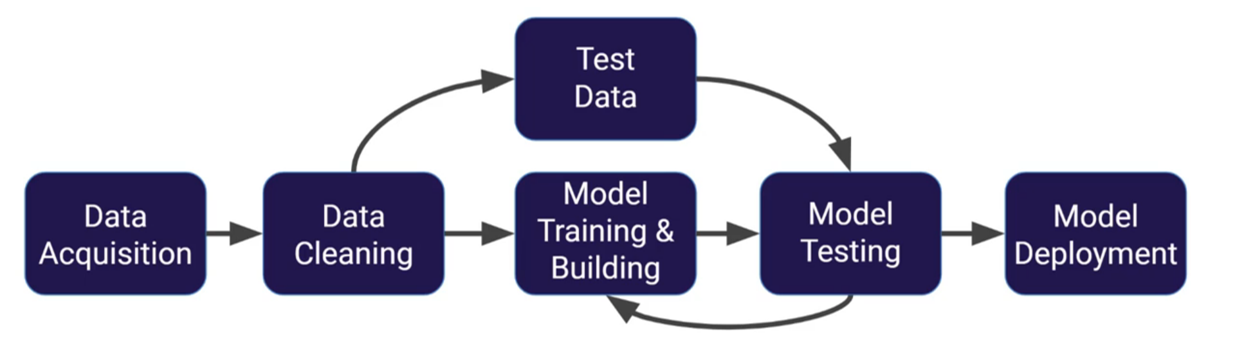

## Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [27]:
df = pd.read_excel("(Train) Winsconsin_breast_cancer.xlsx")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [28]:
df.shape

(559, 32)

In [29]:
df['diagnosis'].value_counts()

B    352
M    207
Name: diagnosis, dtype: int64

## Data preprocessing

In [30]:
# Check missing data
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
LE = LabelEncoder()
df['diagnosis']=LE.fit_transform(df['diagnosis'])

## Feature Selection

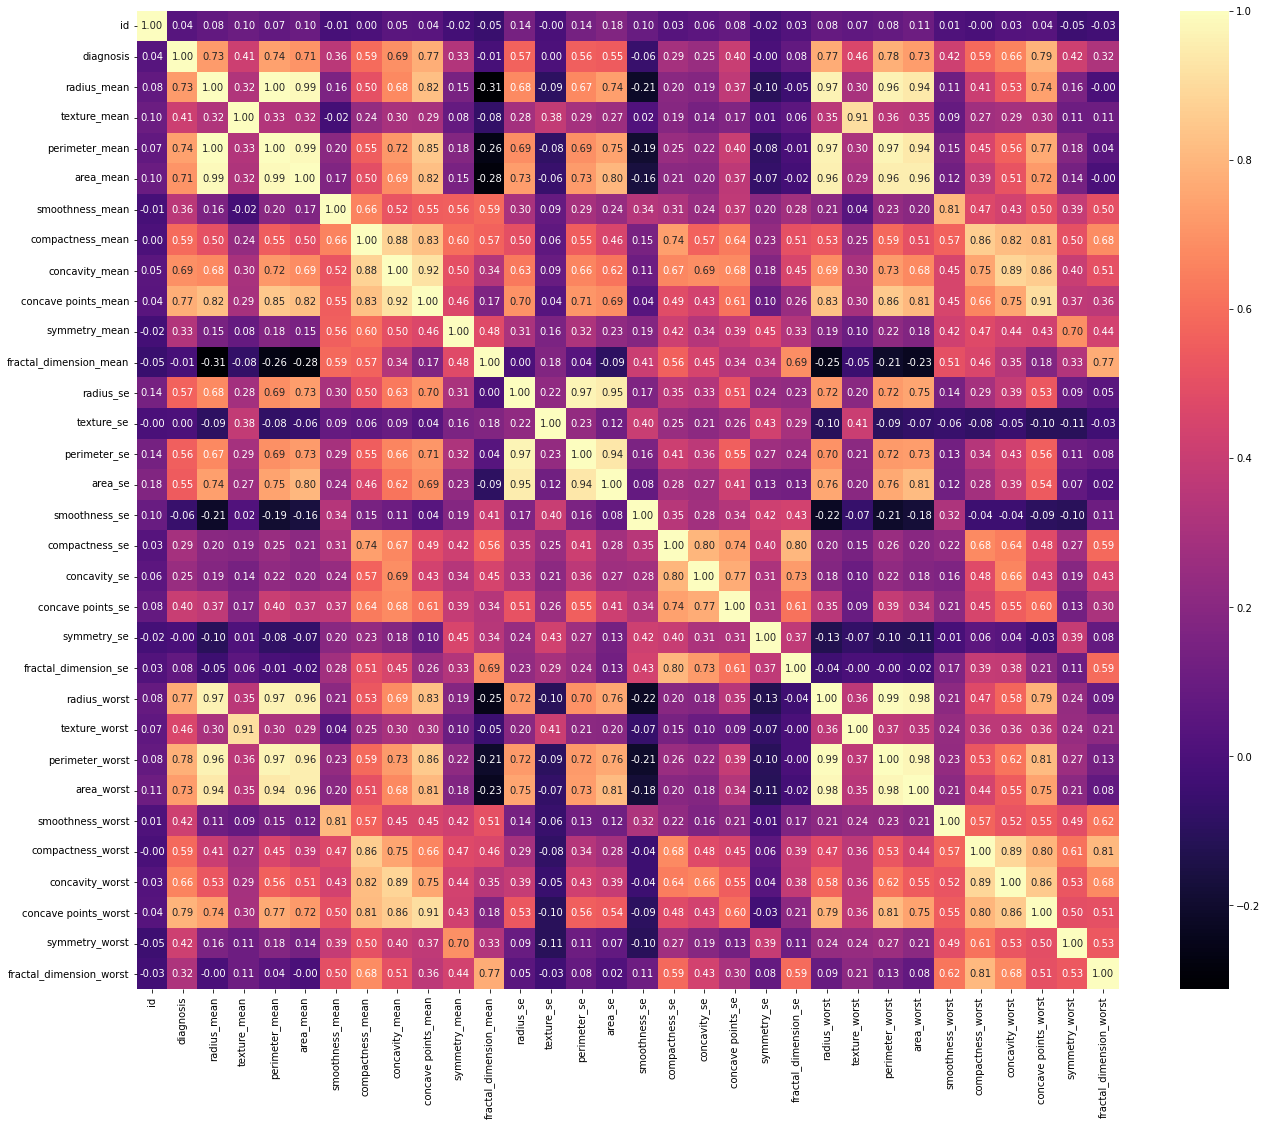

In [33]:
# Correlation heatmap
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [34]:
df1 = df[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']]
df1

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860,1
2,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575,1
3,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625,1
4,12.45,82.57,477.1,0.17000,0.15780,0.08089,0.3345,2.217,27.19,15.470,103.40,741.6,0.52490,0.5355,0.1741,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216,1
555,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628,1
556,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418,1
557,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650,1


## Model Training

In [35]:
X = df1.iloc[:, :15]
y = df1.iloc[:,-1]

Split the dataset into train and validation data

In [64]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

Hyperparameter tuning

In [66]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()

param_dict = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], # Penalty, default = 'l2'
              'C' : np.logspace(-2, 2, 10), # regularization strength, default = 1.0
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], #solver, default = 'lbfgs'
              'max_iter' : [100, 1000]} # default = '100'

grid = GridSearchCV(lc, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

grid.best_params_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

{'C': 100.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Model evaluation

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100, max_iter = 100, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9285714285714286

In [70]:
y_train_pred = model.predict(X_test)

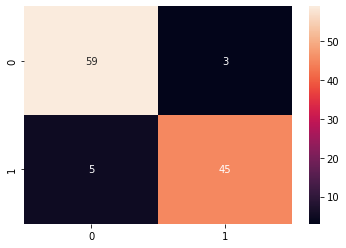

In [72]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_train_pred)

sns.heatmap(cm, annot = True)

## New case

In [60]:
DT = pd.read_excel("New_case_winsconsin_breast_cancer.xlsx")
DT

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
1,857010,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,...,22.820,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
2,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
3,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.014070,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175
4,8911163,M,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.047440,...,20.920,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948
5,903554,B,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.033260,...,13.560,25.80,88.33,559.5,0.14320,0.17730,0.16030,0.06266,0.3049,0.07081
6,9110732,M,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
7,9110944,B,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,...,16.430,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285
8,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
9,925622,M,15.220,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090


In [61]:
DT['diagnosis']=LE.fit_transform(DT['diagnosis'])

In [62]:
DT1 = DT[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']]

X_new = DT1.iloc[:, :15]
y_new = DT1.iloc[:,:-1]

In [63]:
DT1

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,19.690,130.00,1203.0,0.15990,0.19740,0.127900,0.7456,4.585,94.030,23.570,152.50,1709.0,0.42450,0.45040,0.24300,1
1,18.650,123.70,1076.0,0.16860,0.19740,0.100900,0.6289,4.293,71.560,22.820,150.60,1567.0,0.50900,0.73450,0.23780,1
2,8.196,51.71,201.9,0.05943,0.01588,0.005917,0.1563,1.094,8.205,8.964,57.26,242.2,0.13570,0.06880,0.02564,0
3,9.742,61.50,289.9,0.04689,0.01103,0.014070,0.2684,1.750,16.390,10.750,68.09,355.2,0.09370,0.04043,0.05159,0
4,17.930,115.20,998.9,0.07027,0.05699,0.047440,0.4212,2.765,45.810,20.920,135.10,1320.0,0.18060,0.20800,0.11360,1
5,12.100,78.07,446.2,0.09758,0.04783,0.033260,0.2841,1.869,22.220,13.560,88.33,559.5,0.17730,0.16030,0.06266,0
6,17.750,117.30,981.6,0.13140,0.16980,0.082930,0.3897,2.873,43.950,21.530,145.40,1437.0,0.37620,0.63990,0.19700,1
7,14.800,95.88,674.8,0.08890,0.04069,0.022600,0.2204,1.482,19.750,16.430,105.90,829.5,0.18810,0.20600,0.08308,0
8,11.200,70.67,386.0,0.03558,0.00000,0.000000,0.3141,2.041,22.810,11.920,75.19,439.6,0.05494,0.00000,0.00000,0
9,15.220,103.40,716.9,0.20870,0.25500,0.094290,0.2602,2.362,22.650,17.520,128.70,915.0,0.79170,1.17000,0.23560,1


In [54]:
y_pred = model.predict(X_new)

In [55]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    diag.append('M')
  else:
    diag.append('B')

diag = pd.DataFrame(diag, columns = ['diagnosis_pred'])
diag

,diagnosis_pred
0,M
1,M
2,B
3,B
4,M
5,B
6,M
7,B
8,B
9,M
